# INTRODUCTION

This notebook is about stotytelling our main purpose for istaking data and transforming it into actionable insight by using it to tell a story. Data-driven storytelling is a powerful force as it takes stats and metrics and puts them into context through a narrative that everyone inside or outside of the organization can understand.

A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

## Objective of this project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

# Load libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()

'E:\\GIT\\springboard\\Data_storytelling_Adult_income'

### Load Data

In [2]:
data = pd.read_csv("adult.csv/adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

Our dataset has 48842 rows and 15 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There is no null value in our dataset

At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country".

In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**For Age :**

The mean value is 38 i.e. on an average the value of age attribute is 38.
Age is having the standerd deviation 13.71 which indicates the deviation of an observation from the mean.
The value of Age attribute varies from 17 to 90.
The 1st quartile is 28 i.e. 25% of the observations lies below 28.
3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

**For capital-gain :**

For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From the qurtiles it is clearly visible that 75% observations are having capital gain zero.
capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation(7452.01).
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

**For capital-loss :**

This attribute is similar to the capital-gain i.e. most of the values are centered on 0(this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero.
Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is right skewed distribution).

**For hours-per-week :**

This attribute means number of working hours spend by an individual in a week.
In this data the hours per week atrribute varies within the range of 1 to 99.
75 percentage of the people spend 45 or less working hours per week.
The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
Observations are very sparse below 25th percentile and after 75th percentile.
Using quartiles we can say that data is approximately symmetric.
Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which workclass they belong.

In [6]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

As income is our target variable we get to know there is only 2 kind of income in our data set

there are two type of gender in our dataset male and female

In [7]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

# Data Cleaning

Fixing common nan value

Nan values were as ? in data. Hence we fix this with most frequent element(mode) in the entire dataset. It generalizes well, as we will see with the accuracy of our classifiers

In [8]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib 

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.

In [9]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


will fill '?' with most frequent value

Let's check the repartition between gender 

### Gender Distribution

In [10]:
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

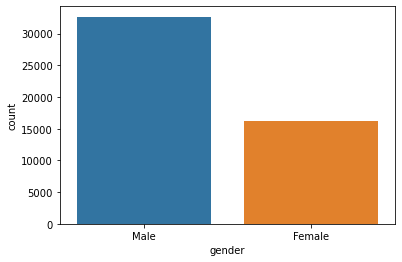

In [11]:
sns.countplot(x="gender", data=data)

we see there are 32650 male and 16192 female in dataset after review the data i find male is double the population of female

Let's find what's the age range 

### Age Distribution

<AxesSubplot:ylabel='Frequency'>

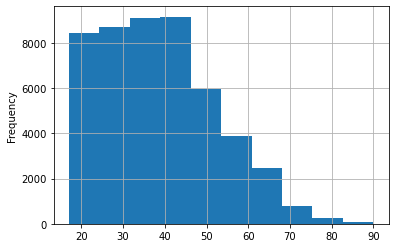

In [12]:
data['age'].plot.hist(grid=True)

we see age is distributed between 15 to 90 

### Hours per week

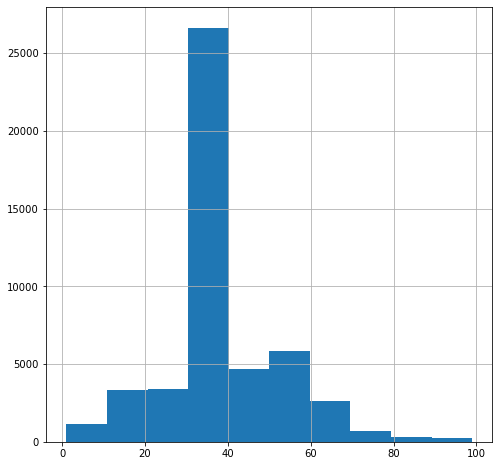

In [13]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

After visualizing the data get to know majority people works 35-40 hour per week.There is some outlier in data means some people works for 80-100 hour per week

### Relation between capital gain and capital loss

Let's explore more about capital loss and capital gain.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


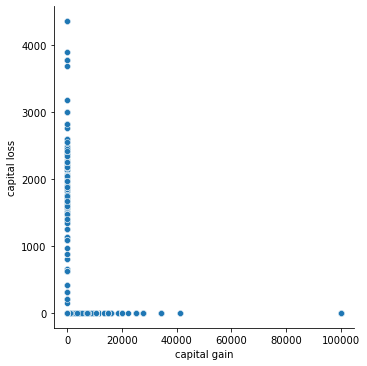

In [14]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero
If capital.gain is zero there is possibility of capital loss being high or above zero.
If capital loss is zero there is possibility of capital.gain being high or above zero.

With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])

### Workclass Distribution

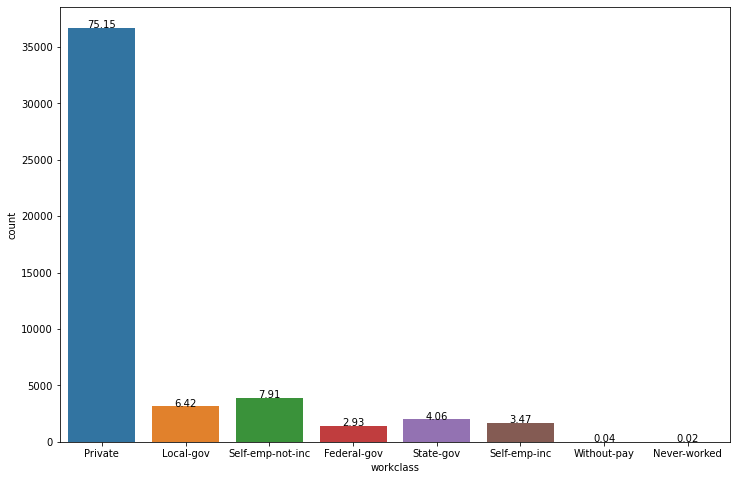

In [15]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

After reviewing the data will find most people work in private sector

Summary distribution shows that:

There are 8 unique categories present in the worclass attribute.
Most of them belong to the private workclass(36705) i.e. 75.15%.
without-pay and never-worked has minimum count in workclass attribute(less than 1%).
There is huge imbalance in the categories of workclass attribute.

### Education

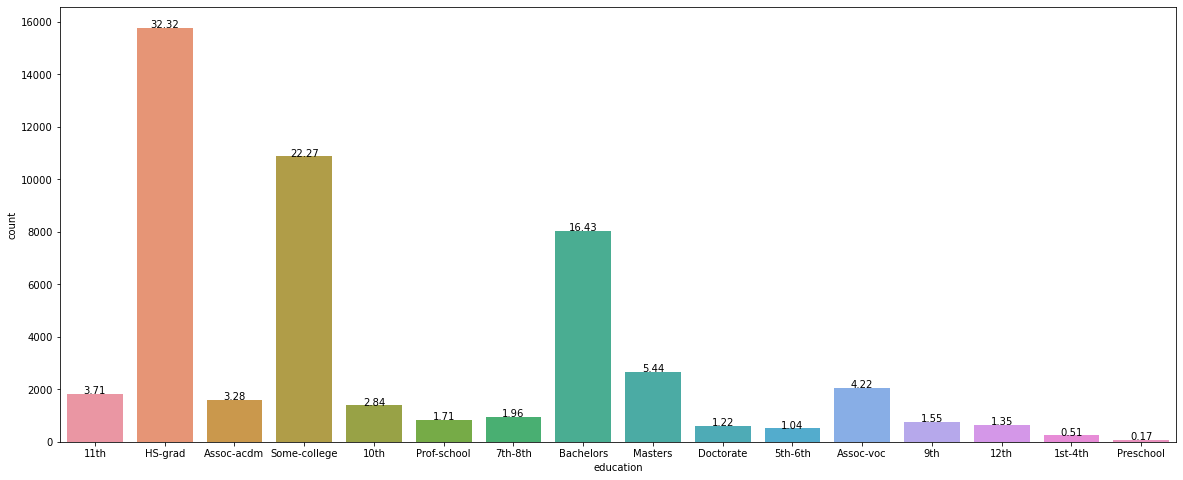

In [16]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Description about distribution

There are 16 unique categories present in the education attribute.
Hs-grad has 32.32% of all the education attribute.
HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
Pre-school has minimum samples i.e. 83.

### Occupation

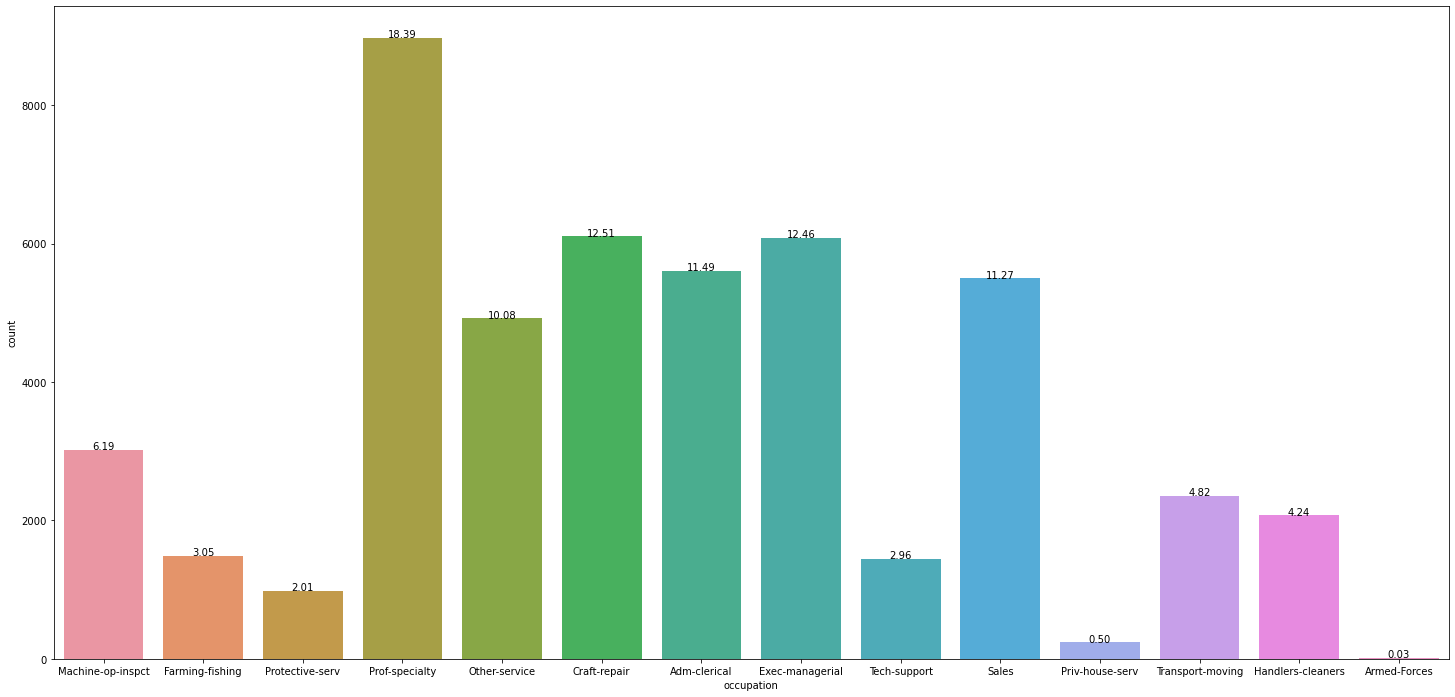

In [17]:
plt.figure(figsize=(25,12))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

There are 14 unique categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces has minimum samples in the occupation attribute.
